In [1]:
import os
import cv2
import pandas
from matplotlib import style
import seaborn as sns
import itertools
import random as rn
from random import shuffle
from zipfile import ZipFile
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,precision_score,roc_curve
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras import backend as k
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adadelta,Adagrad,RMSprop
from tensorflow.keras.utils import to_categorical
import tensorflow
import tensorflow as tf
import fnmatch
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Activation,Flatten,Dropout,BatchNormalization

C:\Users\marihan\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [3]:
print(os.listdir('classes'))

['Adriana Lima', 'Alex Lawther', 'Bill Gates', 'Rihanna']


In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [5]:
X=[]
Z=[]

ADRIANA_LIMA='classes/Adriana Lima'
ALEX_LAWTHER='classes/Alex Lawther'
BILL_GATES='classes/Bill Gates'
RIHANNA='classes/Rihanna'


In [6]:
len(os.listdir(ADRIANA_LIMA))




213

In [7]:
len(os.listdir(ALEX_LAWTHER))

152

In [8]:
len(os.listdir(BILL_GATES))

122

In [9]:
len(os.listdir(RIHANNA))

133

In [10]:
def assign_label(img,name):
    return name
IMG_SIZE=100

In [11]:
def make_train_data(name,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img,'*jpg'):
            label=assign_label(img,name)
            path=os.path.join(DIR,img)
            img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))

In [12]:
make_train_data('Adriana Lima',ADRIANA_LIMA)
print(len(X))



100%|██████████| 213/213 [00:09<00:00, 22.04it/s]

213


In [13]:
make_train_data('Alex Lawther',ALEX_LAWTHER)
print(len(X))

100%|██████████| 152/152 [00:03<00:00, 39.56it/s]

365


In [14]:
make_train_data('Bill Gates',BILL_GATES)
print(len(X))

100%|██████████| 122/122 [00:04<00:00, 28.22it/s]

487


In [15]:
make_train_data('RIHANNA',RIHANNA)
print(len(X))

100%|██████████| 133/133 [00:10<00:00, 12.20it/s]

620


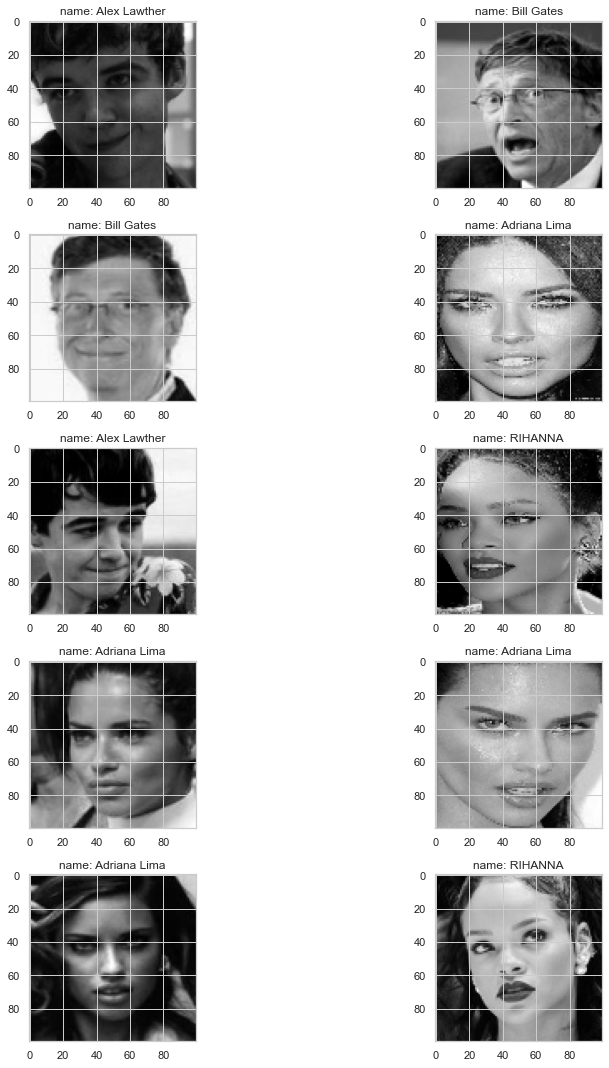

In [16]:
#@title show random samples 
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l],cmap='gray')
        ax[i,j].set_title('name: '+Z[l])
plt.tight_layout()        
    

In [17]:
ax

array([[<AxesSubplot:title={'center':'name: Alex Lawther'}>,
        <AxesSubplot:title={'center':'name: Bill Gates'}>],
       [<AxesSubplot:title={'center':'name: Bill Gates'}>,
        <AxesSubplot:title={'center':'name: Adriana Lima'}>],
       [<AxesSubplot:title={'center':'name: Alex Lawther'}>,
        <AxesSubplot:title={'center':'name: RIHANNA'}>],
       [<AxesSubplot:title={'center':'name: Adriana Lima'}>,
        <AxesSubplot:title={'center':'name: Adriana Lima'}>],
       [<AxesSubplot:title={'center':'name: Adriana Lima'}>,
        <AxesSubplot:title={'center':'name: RIHANNA'}>]], dtype=object)

In [18]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255.0



In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [20]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)
x_train=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) 

In [21]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=( 100, 100,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(.5))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [22]:
batch_size=128
epochs=1
from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=.1)



In [23]:
datagen=ImageDataGenerator(featurewise_center=False,samplewise_center=False,
                          featurewise_std_normalization=False,
                          samplewise_std_normalization=False,
                          zca_whitening=False,
                          rotation_range=10,
                          zoom_range=.1,
                          width_shift_range=.2,
                          height_shift_range=.2,
                          horizontal_flip=True,
                          vertical_flip=False)

datagen.fit(x_train)

In [24]:
model.compile(optimizer=Adam(lr=.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)

In [26]:
mo=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size)
                    ,epochs=100
                    ,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[callback]
                   )


Epoch 1/100
4/4 [==============================] - 37s 9s/step - loss: 1.5178 - accuracy: 0.2774 - val_loss: 1.3725 - val_accuracy: 0.3548
Epoch 2/100
4/4 [==============================] - 22s 6s/step - loss: 1.4304 - accuracy: 0.2323 - val_loss: 1.3838 - val_accuracy: 0.4323
Epoch 3/100
4/4 [==============================] - 22s 5s/step - loss: 1.3868 - accuracy: 0.3333 - val_loss: 1.3430 - val_accuracy: 0.3548
Epoch 4/100
4/4 [==============================] - 21s 6s/step - loss: 1.3935 - accuracy: 0.3419 - val_loss: 1.3499 - val_accuracy: 0.3548
Epoch 5/100
4/4 [==============================] - 22s 5s/step - loss: 1.3555 - accuracy: 0.3462 - val_loss: 1.2953 - val_accuracy: 0.3677
Epoch 6/100
4/4 [==============================] - 21s 5s/step - loss: 1.3358 - accuracy: 0.3634 - val_loss: 1.2002 - val_accuracy: 0.5290
Epoch 7/100
4/4 [==============================] - 20s 5s/step - loss: 1.2416 - accuracy: 0.4559 - val_loss: 1.2102 - val_accuracy: 0.4000
Epoch 8/100
4/4 [==========

In [27]:
model.evaluate(x_test,y_test,batch_size=128)

2/2 [==============================] - 2s 235ms/step - loss: 0.4107 - accuracy: 0.8710


[0.4107254147529602, 0.8709677457809448]

In [28]:
model.predict(x_test)

5/5 [==============================] - 2s 370ms/step


array([[7.80476034e-01, 4.12812311e-04, 8.95724748e-04, 2.18214810e-01,
        6.29789838e-07],
       [9.15955156e-02, 5.75674837e-03, 2.76576751e-03, 8.99880707e-01,
        1.23137352e-06],
       [8.87723804e-01, 2.79305212e-04, 7.13510162e-05, 1.11925520e-01,
        7.54638521e-08],
       [8.91347975e-03, 8.13417196e-01, 1.69914499e-01, 7.72737013e-03,
        2.74036120e-05],
       [6.09394789e-01, 1.86277945e-02, 1.02653131e-01, 2.69260108e-01,
        6.42349696e-05],
       [1.19311653e-01, 8.67498741e-02, 2.37090723e-03, 7.91564405e-01,
        3.10841460e-06],
       [4.94703697e-03, 9.68929291e-01, 3.39165446e-03, 2.27318741e-02,
        1.64739703e-07],
       [7.06857163e-03, 8.49071562e-01, 1.34070814e-01, 9.69591085e-03,
        9.31276591e-05],
       [3.36053828e-03, 7.95333564e-01, 1.64201304e-01, 3.70406732e-02,
        6.39941718e-05],
       [1.69854209e-01, 5.47705870e-03, 2.34664441e-03, 8.22308660e-01,
        1.33974854e-05],
       [6.31502247e-04, 7.0105

In [29]:
def prepare(filepath):
    IMG_SIZE=100
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    return new_img
    
    

In [30]:
prediction=model.predict(np.array([prepare("classes/Alex Lawther/Alex Lawther0_0.jpg")]))

1/1 [==============================] - 1s 656ms/step


In [31]:
os.listdir('classes')[np.argmax(prediction)]

'Bill Gates'

In [32]:
prediction[0][4]

0.0

In [33]:
import os
import cv2

cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')

In [36]:
from tkinter import*
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
import cv2
from PIL import ImageTk, Image


# create the root window
root = tk.Tk()
root.title('Tkinter Open File Dialog')
root.resizable(False, False)
root.geometry('500x300')


# input in function io refer to path
def io(input):
    face_cascade = cv2.CascadeClassifier(
        haar_model)
    img = cv2.imread(input)

    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4, minSize=(20, 20))

    cv2.putText(img,os.listdir('classes')[np.argmax(model.predict(np.array([prepare(input)])))], (0, 20), cv2.FONT_HERSHEY_TRIPLEX, .6, (255,255,0))
    #cv2.putText(img,"ANN :"+ str(ann.recognize(input)), (0, 60), cv2.FONT_HERSHEY_TRIPLEX, .6, (0, 0, 255))

    
    for x,y,width,height in faces:
        img=cv2.rectangle(img,(x,y),(x+width,y+height),(255,255,0),2)
    cv2.imshow('image', cv2.resize(img, (555, 555))) 
    cv2.waitKey(0)


def select_file():
    filetypes = (
        ('Photos', '*.jpg'),
        ('Photoss', '*.png'),
        ('All files', '.')
    )

    filename = fd.askopenfilename(
        title='choose img',
        initialdir='classes',
        filetypes=filetypes)

    io(filename)
style = ttk.Style()
style.configure("Custom.TButton",
                 foreground="black",
                 background="white",
                 padding=[10, 10, 10, 10],
                 font="Verdana 12 underline")

# open button
open_button = ttk.Button(
    root,
    text='Open a File',
    command=select_file,style="Custom.TButton"
)

img  = Image.open("3d-face-recognition-icon-png-removebg-preview.png")
img = img.resize((200,200), Image.ANTIALIAS)
photo=ImageTk.PhotoImage(img)
lab=Label(image=photo).pack()

open_button.pack()

# run the application
root.mainloop()


1/1 [==============================] - 0s 58ms/step


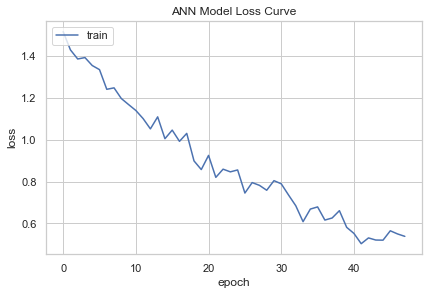

In [37]:
plt.plot(mo.history['loss'])  # loss curve
plt.title('ANN Model Loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()



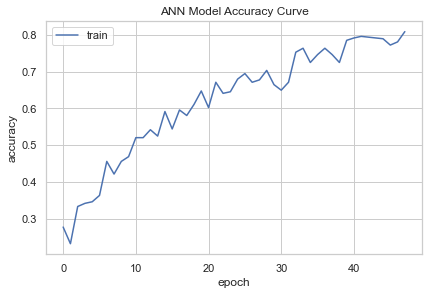

In [38]:
plt.plot(mo.history['accuracy'])  # accuracy curve
plt.title('ANN Model Accuracy Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()